In [31]:
import sys
sys.path.append("../../../")

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

from LRM.plotting import set_plot_style
from LRM.CMP import CMP, SmoothedEmpiricalDensity
from LRM.minimax_tilting_sampler import TruncatedMVN


set_plot_style()

RUN_COMPUTATION = False #whether to run the computation time snippets
RUN_PREDICTIVE = True #if predictive samples haven't been stored in ./results yet, set to True
SAVE=False

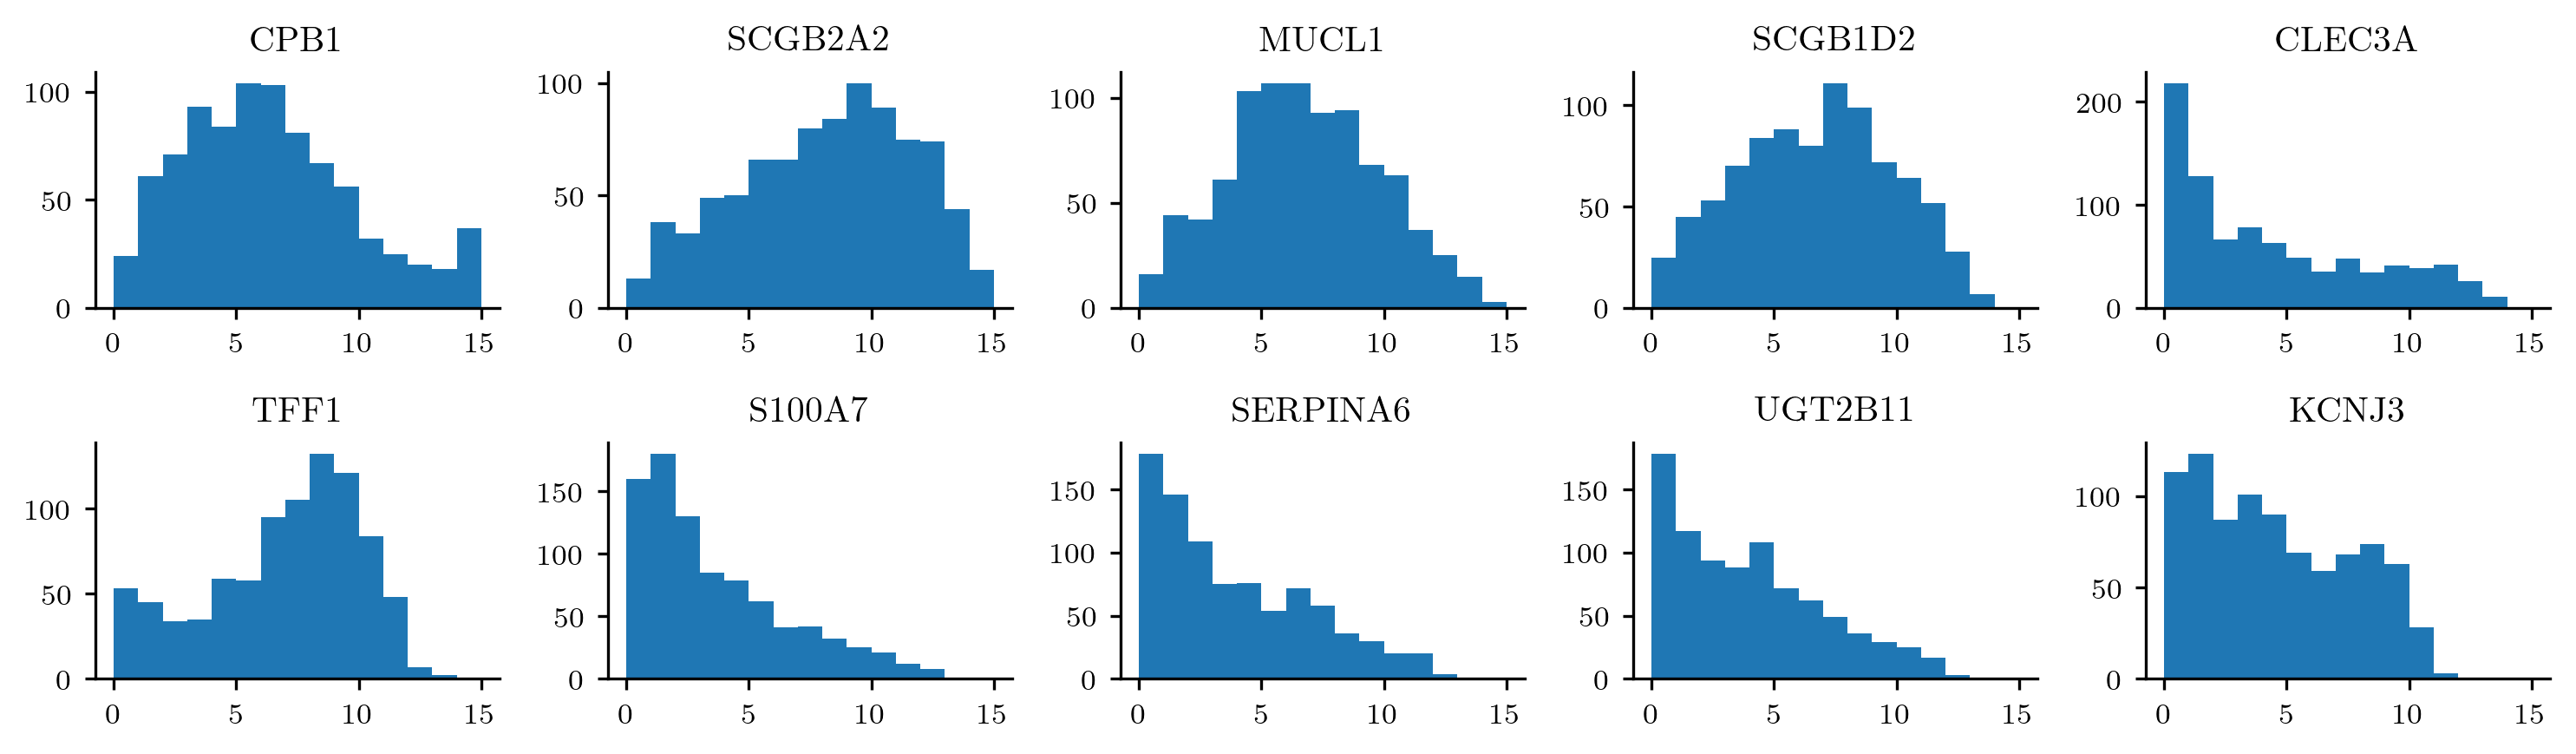

In [16]:
labels = [["CPB1", "SCGB2A2", "MUCL1", "SCGB1D2", "CLEC3A"],["TFF1", "S100A7", "SERPINA6", "UGT2B11", "KCNJ3"]]

def plot_data(samples):
    assert len(samples.shape) == 2 and samples.shape[1] == 10
    fig, axs = plt.subplots(2, 5, figsize=(10,3))

    count = 0
    for i in range(2):
        for j in range(5):
            axs[i, j].hist(samples[:, count], bins=np.arange(16))
            axs[i, j].set_title(labels[i][j])
            count+=1
    
    fig.tight_layout()

raw_data = np.load("../../../data/brca_10.npy").astype(np.int64)
plot_data(raw_data)

## Plotting

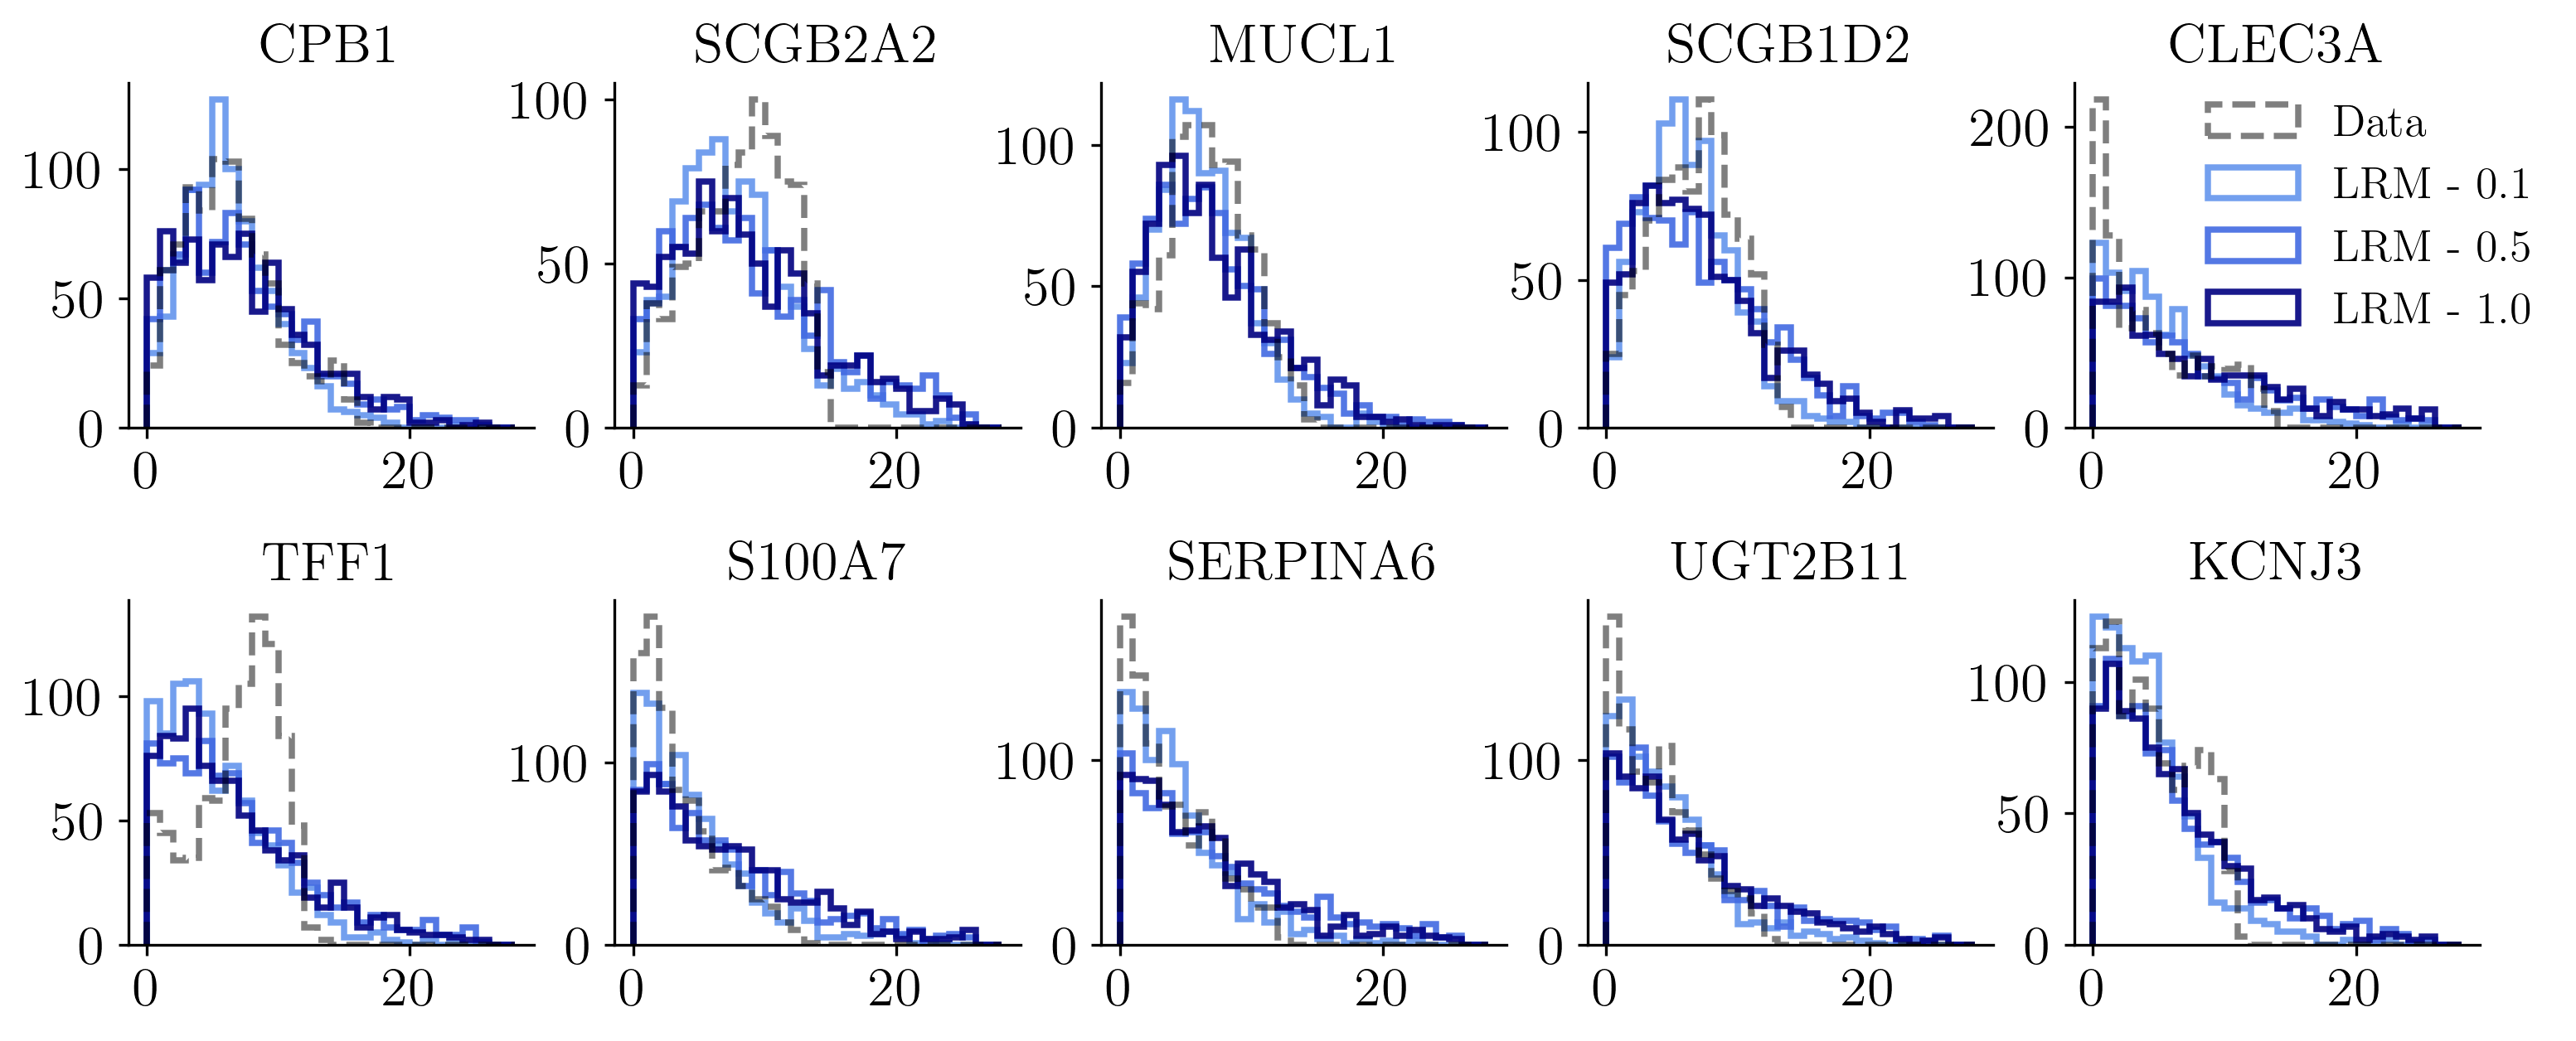

In [30]:
fig, axs = plt.subplots(2, 5, figsize=(12.2,4.5))
labels = [["CPB1", "SCGB2A2", "MUCL1", "SCGB1D2", "CLEC3A"],["TFF1", "S100A7", "SERPINA6", "UGT2B11", "KCNJ3"]]
N_MAX=28
model_data01 = np.load("outputs/posterior_pred_samples_LRM_calibrated_alpha=0.1.npz")["model_data"]
model_data05 = np.load("outputs/posterior_pred_samples_LRM_calibrated_alpha=0.5.npz")["model_data"]
model_data1 = np.load("outputs/posterior_pred_samples_LRM_calibrated_alpha=1.0.npz")["model_data"]

count = 0
lw = 1.8
for i in range(2):
    for j in range(5):
        axs[i, j].hist(raw_data[:, count], histtype='step', bins=np.arange(N_MAX+1), label="Data",color='black', alpha=0.5, linestyle='--', linewidth=lw, zorder=3)
        #axs[i, j].hist(predictives_cmp[0, :, count], histtype='step', bins=np.arange(N_MAX+1), label="DFD", color='green', linestyle='-', linewidth=lw, alpha=0.9, zorder=2)
        axs[i, j].hist(model_data01[:, count], histtype='step', bins=np.arange(N_MAX+1), label="LRM - 0.1", color='cornflowerblue', linestyle='-', linewidth=lw, alpha=0.9, zorder=1)
        axs[i, j].hist(model_data05[:, count], histtype='step', bins=np.arange(N_MAX+1), label="LRM - 0.5", color='#4169E1', linestyle='-', linewidth=lw, alpha=0.9, zorder=1)
        axs[i, j].hist(model_data1[:, count], histtype='step', bins=np.arange(N_MAX+1), label="LRM - 1.0", color='#000080', linestyle='-', linewidth=lw, alpha=0.9, zorder=1)


        axs[i, j].set_title(labels[i][j], fontsize=16)
        count+=1

axs[0,-1].legend(frameon=False, fontsize=13, bbox_to_anchor=(0.23, 0.16))

for ax in axs.flat:
    ax.tick_params(axis='both', labelsize=16)

fig.subplots_adjust(hspace=0.5)

if SAVE:
    plt.savefig("./results/alpha-sensitivity-BRCA-fit.pdf", format='pdf', bbox_inches='tight')